# Individual Assignment- Analysis of Ad-Hoc Communications Network 

We have been tasked to pan the an ad-hoc communications network over a rectangular region. Each individual tower can monitor a rectangular subsection of a specific width and height. The location of the tower is generated randomly from a uniform distribution. The height and width of the tower is also generated from a uniform random distribution. I have used numpy.random.randint to generate the uniform random number. numpy.random.randint returns random integers from the “discrete uniform” distribution in the speacified range.

### Class Tower
Defined class tower which is is used to generate towers with random locations, height and weight. Also a function resize is defined which generates towers with specific location and dimension. This function is used in the testcase to ensure that trimming of rectangles is implemented correctly. 

In [61]:
from copy import deepcopy
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
class tower(object):
    '''Tower class
    Generates coordinates for rectangles based on discrete uniform distribution
    Returns a tuple containing all the coordinates
    '''
    posx=0
    posy=0
    posx1=0
    posy1=0
    coord=((0,0),(0,0),(0,0),(0,0))
    def __init__(self,l,b):
        assert isinstance (l,int) and isinstance (b,int),"l,b not integer"
        self.posx=np.random.randint(0,l)
        self.posy=np.random.randint(0,b)
        self.posx1=np.random.randint(self.posx,l)
        self.posy1=np.random.randint(self.posy,b)
        self.coord=((self.posx,self.posy),(self.posx1,self.posy),(self.posx,self.posy1),(self.posx1,self.posy1))
    def __repr__(self):
        return 'Coordinates are'+str((self.coord[0][0], self.coord[0][1],self.coord[3][0], self.coord[3][1] ))
    def resize(self,x1,y1,x2,y2):
        assert isinstance (x1,int) and isinstance (y1,int) and isinstance (x2,int) and isinstance (y2,int)
        self.coord=((x1,y1),(x2,y1),(x1,y2),(x2,y2))
        
    

   
    

### Class Area
Defined class area which generates a matrix representing the area covered by network. This expects a tower, length, breadth and the number assigned to the tower as inputs. Also defined a function which adds the area of two regions and stores in the first region

In [117]:
class area(object):
    '''
    Generates matrix with area given a tower. Also adds the area of two regions
    
    '''
    def __init__(self,t,l,b,n):
        '''
        t: tower
        l: length of entire region
        b: breadth of entire region
        '''
        assert isinstance (t,tower) and isinstance (l,int) and isinstance (b,int) and isinstance (n,int)
        self.m=[[0 for y in range(l)] for x in range (b)]        
        for i in range(t.coord[0][0],t.coord[3][0]+1):
            for j in range(t.coord[0][1],t.coord[3][1]+1):
                self.m[j][i]=n
    def __add__(self,other):
        '''
        Adds area of two regions and outputs a single area object
        '''
        assert isinstance(self,area) and isinstance(other,area)
        for i in range(len(self.m)):
            for j in range(len(self.m[i])):
                self.m[i][j]=self.m[i][j]+other.m[i][j]
        return self
    def copy(self,other):
        '''
        Adds area of two regions and outputs a single area object
        '''
        assert isinstance(self,area) and isinstance(other,area)
        for i in range(len(self.m)):
            for j in range(len(self.m[i])):
                self.m[i][j]=other.m[i][j]
        return self
            
    
                
                
        
        

Findnonoverlap function determines the non overalapping region between the total region covered before adding the new tower and the new tower. The function returns a matrix with non overlapping region which is used to find the largest non overlapping rectangle. 

In [3]:
def findnonoverlap(totalcoverage,c,n,l,b):
    '''
    finds the non overlapping region given current totalcoverage, tower, tower sequence number,
    length and breadth of region
    '''
    a1= deepcopy(totalcoverage.m)
    x1 = c.coord[0][0]
    y1 = c.coord[0][1]
    x2 = c.coord[3][0]
    y2 = c.coord[3][1]
    for i in range(x1,x2+1):
        for j in range(y1,y2+1):
            a1[j][i]+=n
    
    temp=[]
    for i in range(b):
        row=[]
        for j in range(l):
            row.append(int(a1[i][j] == n))
        temp.append(row)
            
   
    return temp
            
    

Maximal Rectangle function finds the maximum possible rectangle in the non-overlapping region. It takes a matrix of ones and zeros and returns the position, height and width of the maximal rectangle.
### Algorithm
Initially, I define an array of length n+1 which contains height. This counts the number of ones above the point inclusive of point. It is zero if the value in the matrix is zero. Then, I have used a running counter to keep track of the maximum area. I iterate through the height array and store the iterated column value in a stack. If the height of the current column is lesser than the height of the previous column, then I pop out the stack value. 
I also calculated the corresponding area using - 
1. Height of the corresponding column from height matrix 

2. Width calculated by subtracting the popped out column position from current column position.

I continue this until the height of the last element in stack is equal or lesser than the height of current element in stack. This ensures that I go through all the possible rectangles. I am storing the area value in area variable and the location in pos tuple.

In [4]:
def maximalRectangle(matrix):
    """
    Finds the maximal rectangle in the trimmed region
    Input is the matrix of non overlapping region
    """
        
    if not matrix or not matrix[0]:
        return 0
    #for row in matrix:
     #   print (row)
           
    n = len(matrix[0])
    height = [0] * (n + 1)
    area = 0
    j=0;
    pos=(0,0,0,0)
    for row in matrix:
        for i in range(n):
            height[i] = height[i] + 1 if row[i] == 1 else 0
        stack = [-1]
        for i in range(n + 1):
            while height[i] < height[stack[-1]]:
                h = height[stack.pop()]
                w = i - 1 - stack[-1]

                    
                if h*w >area:
                    pos =(stack[-1]+1, j-h+1,w,h)
                area = max(area, h * w)
             
            stack.append(i)
           
        j+=1

    return pos,area




In [5]:
def areacov(n,l,b):
    '''
    Generates a matrix containing information about area coverage
    The number in the matrix tells us which tower covers that particular point
    returns the coverage coordinates of tower1 and tower 2
    '''
    tower1 =[]
    tower2 =[]
    m=[[]]
    temp=[[0 for y in range(l)] for x in range (b)]
    for i in range(n):
        
        if i==0:
            c=tower(l,b)
            totalcoverage=area(c,l,b,1)
            tower1.append(c)
            tower2.append(c)
        if i:
            ans=0
            while ans==0:
                c=tower(l,b)
                temp=findnonoverlap(totalcoverage,c,i+1,l,b)
                maxrect,ans=maximalRectangle(temp)
            tower2.append(c)
            newtower=tower(l,b)
            newtower.resize(maxrect[0],maxrect[1],maxrect[0]+maxrect[2]-1,maxrect[1]+maxrect[3]-1)
            tower1.append(newtower)
            area_new=area(newtower,l,b,i+1) 
            totalcoverage+area_new
    return totalcoverage,tower1,tower2

In [175]:
def total_area_towerlist(towerlist,l,b):
    updatedtowerlist=[]
    firsttower=tower(l,b)
    firsttower.resize(towerlist[0].coord[0][0],towerlist[0].coord[0][1],towerlist[0].coord[3][0],towerlist[0].coord[3][1])
    updatedtowerlist.append(firsttower)
    totalcoverage1=area(firsttower,l,b,1)
    for i in range(1,len(towerlist)):
        tower1=tower(l,b)
        tower1.resize(towerlist[i].coord[0][0],towerlist[i].coord[0][1],towerlist[i].coord[3][0],towerlist[i].coord[3][1])
        temp=findnonoverlap(totalcoverage1,tower1,i+1,l,b)
        maxrect,ans=maximalRectangle(temp)
        newtower=tower(l,b)
        newtower.resize(maxrect[0],maxrect[1],maxrect[0]+maxrect[2]-1,maxrect[1]+maxrect[3]-1)
        area_new=area(newtower,l,b,i+1)
        updatedtowerlist.append(newtower)
        totalcoverage1+area_new
    sns.heatmap(totalcoverage1.m, annot=True, fmt="d")
    area1=0
    for i in range(l):
        for j in range(b):
            if totalcoverage1.m[j][i] > 0:
                area1+=1
    print("Resulting resolved coverage:",area1)
    return updatedtowerlist

In [176]:
def generate_towers_random(n,l,b):
    towerlist=[]
    for i in range(n):
        tower1= tower(l,b)
        towerlist.append(tower1)
    return towerlist
    

In [177]:

def generate_towers(tower_list_coord,l,b):
    towerlist=[]
    for i in range(len(tower_list_coord)):
        tower1= tower(l,b)
        tower1.resize(tower_list_coord[i][0],tower_list_coord[i][1],tower_list_coord[i][2],tower_list_coord[i][3])
        towerlist.append(tower1)
    return towerlist

## Question1

Given an overall desired coverage footprint and a sequence of ​n communications towers, what is the resulting resolved coverage?

I have implemented question 1 in two ways. In the first method, I am passing towers of fixed size using function generate_towers. Every tower is represented by a tuple with 4 values. First value is the x coordinate of the top-left point. Second value is the y coordinate of the top-left point. Third value is the x coordinate of the bottom-right point. Fourth value is the y coordinate of the bottom-right point. That is (x0,y0,x3,y3). We can modify the input - towerlist and see the result

('Resulting resolved coverage:', 50)
Towers before resolution

[Coordinates are(0, 0, 4, 3), Coordinates are(2, 2, 5, 4), Coordinates are(3, 1, 6, 4), Coordinates are(2, 2, 7, 7), Coordinates are(1, 6, 9, 6)]


Towers after resolution

[Coordinates are(0, 0, 4, 3), Coordinates are(2, 4, 5, 4), Coordinates are(5, 1, 6, 3), Coordinates are(2, 5, 7, 7), Coordinates are(8, 6, 9, 6)]


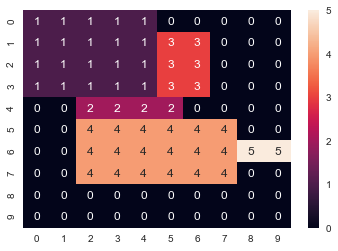

In [178]:
towerlist=[(0,0,4,3),(2,2,5,4),(3,1,6,4),(2,2,7,7),(1,6,9,6)]

towerlist1=generate_towers(towerlist,10,10)
towerlistret=total_area_towerlist(towerlist1,10,10)
print("Towers before resolution\n")
print(towerlist1)
print("\n")
print("Towers after resolution\n")
print(towerlistret)



In the second method, I am generating random towers using function generate_towers_random. The function generate_towers_random expects number of towers, length and breadth of the desired coverage area as the input

('Resulting resolved coverage:', 41)
Towers before resolution

[Coordinates are(0, 6, 4, 7), Coordinates are(0, 8, 0, 8), Coordinates are(6, 6, 9, 7), Coordinates are(2, 6, 2, 7), Coordinates are(5, 5, 6, 8), Coordinates are(6, 7, 9, 7), Coordinates are(1, 1, 6, 1), Coordinates are(9, 6, 9, 7), Coordinates are(3, 4, 9, 9), Coordinates are(6, 3, 9, 8)]


Towers after resolution

[Coordinates are(0, 6, 4, 7), Coordinates are(0, 8, 0, 8), Coordinates are(6, 6, 9, 7), Coordinates are(0, 0, -1, -1), Coordinates are(5, 5, 5, 8), Coordinates are(0, 0, -1, -1), Coordinates are(1, 1, 6, 1), Coordinates are(0, 0, -1, -1), Coordinates are(6, 4, 9, 5), Coordinates are(6, 3, 9, 3)]


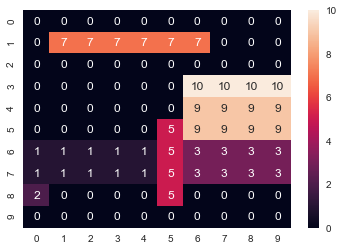

In [185]:

towerlist1=generate_towers_random(10,10,10)
towerlistret=total_area_towerlist(towerlist1,10,10)
print("Towers before resolution\n")
print(towerlist1)
print("\n")
print("Towers after resolution\n")
print(towerlistret)

## Question 2

What is the total area of coverage relative to the desired total coverage area of the original footprint? That is, are there any gaps in coverage?

In [34]:
def avarea(n,l,b):
    area=0
    cov,tow1,tow2=areacov(n,l,b)
    for i in range(l):
        for j in range(b):
            if cov.m[j][i] > 0:
                area+=1
    print("Area covered = ",area)
    print("Total area covered relative to the desired total coverage area = ",float(area)/(l*b))

Function avrea expects number of towers, length and breadth of desired coverage region as input

In [36]:
avarea(10,10,10)

('Area covered', 43)
('Total area covered relative to the desired total coverage area', 0.43)


## Question 3

On average, how many communications towers are required before full coverage is obtained?

In [166]:
def tower_fullcoverage(l,b,plotin):
    '''
    Generates number of towers required for full coverage
    '''
    tower1 =[]
    tower2 =[]
    m=[[]]
    return_area=0
    i=0
    temp=[[0 for y in range(l)] for x in range (b)]
    while return_area != l*b:
        
        if i==0:
            c=tower(l,b)
            totalcoverage=area(c,l,b,1)
            tower1.append(c)
            tower2.append(c)
        if i:
            ans=0
            while ans==0:
                c=tower(l,b)
                temp=findnonoverlap(totalcoverage,c,i+1,l,b)
                maxrect,ans=maximalRectangle(temp)
            tower2.append(c)
            newtower=tower(l,b)
            newtower.resize(maxrect[0],maxrect[1],maxrect[0]+maxrect[2]-1,maxrect[1]+maxrect[3]-1)
            tower1.append(newtower)
            area_new=area(newtower,l,b,i+1) 
            totalcoverage=totalcoverage+area_new
            return_area=0
            for i1 in range(l):
                for j1 in range(b):
                    if totalcoverage.m[j1][i1] > 0:
                        return_area+=1
        i+=1
    if plotin:
        sns.heatmap(totalcoverage.m, annot=True, fmt="d")
        
    return i

In [167]:
def avtower_fullcoverage(l,b):
    tow=0
    for i in range(30):
        tow+=tower_fullcoverage(l,b,0)
    return (tow/30)
    

Function avtower_fullcoverage expects length and breadth of the desired coverage region as the input

In [168]:
avtower_fullcoverage(10,20)

37

30

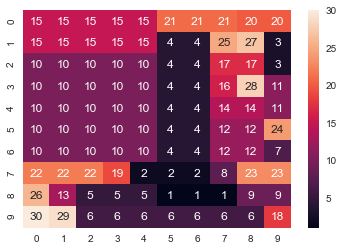

In [169]:
tower_fullcoverage(10,10,1)

## Testcase

List towerlist contains the list of rectangles.

Every tower is represented by a tuple with 4 values. First value is the x coordinate of the top-left point. Second value is the y coordinate of the top-left point. Third value is the x coordinate of the bottom-right point. Fourth value is the y coordinate of the bottom-right point. That is (x0,y0,x3,y3).

In [137]:
towerlist=[(0,0,4,3),(2,2,5,4),(3,1,6,4),(2,2,7,7),(1,6,9,6)]

In [198]:
def testcase(towerlist,l,breadth):
    c=tower(l,breadth)
    c.resize(towerlist[0][0],towerlist[0][1],towerlist[0][2],towerlist[0][3])
    totalcoverage1=area(c,l,breadth,1)
    plt.set_cmap('tab10')
    print("Rectangle 1 enters")
    plt.grid(None)
    plt.imshow(totalcoverage1.m)
    plt.colorbar()
    plt.show()

    for i in range(1,len(towerlist)):
        b=tower(l,breadth)
        b.resize(towerlist[i][0],towerlist[i][1],towerlist[i][2],towerlist[i][3])
        area_new=area(b,l,breadth,i+1)
        totalcoverage=area(b,l,breadth,i+1)
        totalcoverage.copy(totalcoverage1)
        totalcoverage+area_new
        plt.figure(figsize = (12,4))
        plt.subplot(1,2,1)
        plt.grid(None)
        plt.imshow(totalcoverage.m)
        plt.colorbar()
        plt.subplot(1,2,2)
        b.resize(towerlist[i][0],towerlist[i][1],towerlist[i][2],towerlist[i][3])
        temp=findnonoverlap(totalcoverage1,b,i+1,l,breadth)
        maxrect,ans=maximalRectangle(temp)
        newtower=tower(l,breadth)
        newtower.resize(maxrect[0],maxrect[1],maxrect[0]+maxrect[2]-1,maxrect[1]+maxrect[3]-1)
        area_new=area(newtower,l,breadth,i+1)
        totalcoverage1+area_new
        plt.grid(None)
        plt.imshow(totalcoverage1.m)
        plt.colorbar()
       
        print("Rectangle "+str(i+1)+" entered and resolved")
        plt.show()

In [199]:
towerlist=[(0,0,4,3),(2,2,5,4),(3,1,6,4),(2,2,7,7),(1,6,9,6),(5,0,9,9)]

Rectangle 1 enters


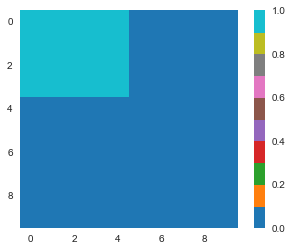

Rectangle 2 entered and resolved


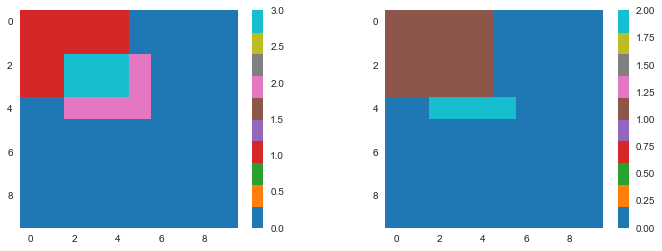

Rectangle 3 entered and resolved


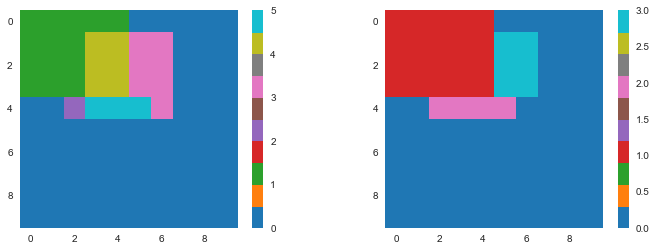

Rectangle 4 entered and resolved


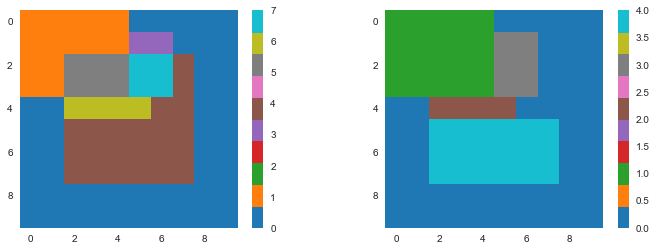

Rectangle 5 entered and resolved


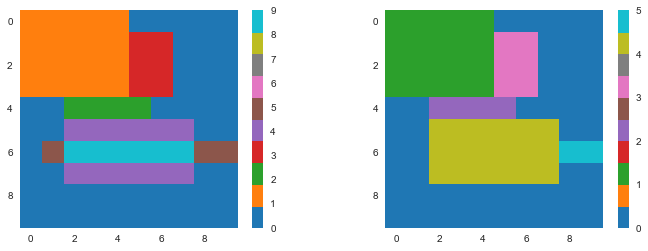

Rectangle 6 entered and resolved


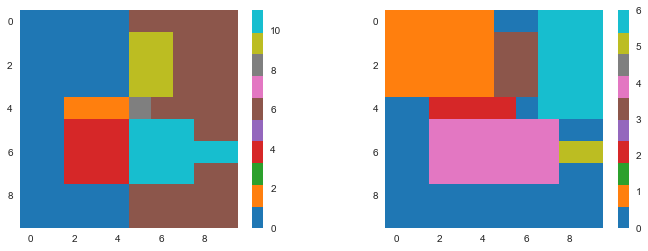

In [200]:
testcase(towerlist,10,10)

## Analysis
